In [1]:
#read in and process data
import pandas as pd
df = pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [2]:
dataset = df.values
#converts datagrame into array
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [3]:
#split dataset into input features and predictions
#first 10 columns are inputs and last columns is predictions
X = dataset[:, 0:10]
Y = dataset[:, 10]

In [4]:
from sklearn import preprocessing
#scale the dataset so all the input features are 
#between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [5]:
#now split data into training set, validation set, test set
#separate training set from validation+test
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

#then separate validation and test set
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.utils

#define model architecture
model = Sequential([
    #first layer, dense layer with 32 neurons and relu activation
    #"Dense" refers to a fully connected layer
    Dense(32, activation='relu', input_shape=(10,)),
    
    #second layer is also a fully connected layer
    Dense(32, activation='relu'),
    
    #third layer has sigmoid activation
    Dense(1, activation='sigmoid'),
])

In [10]:
#configure the model - stochastic gradient descent optimizer
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
#train the model!
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6757 - accuracy: 0.6830 - val_loss: 0.6699 - val_accuracy: 0.7580
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 0.7916 - val_loss: 0.6651 - val_accuracy: 0.7991
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6617 - accuracy: 0.8063 - val_loss: 0.6602 - val_accuracy: 0.8128
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6557 - accuracy: 0.8053 - val_loss: 0.6554 - val_accuracy: 0.8037
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6499 - accuracy: 0.7984 - val_loss: 0.6501 - val_accuracy: 0.7900
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6440 - accuracy: 0.7867 - val_loss: 0.6440 - val_accuracy: 0.8082
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6380 - accuracy: 0.8219 - val_loss: 0.6389 - val_accuracy: 0.7900
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.8708 - val_loss: 0.2924 - val_accuracy: 0.8813
Epoch 60/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3281 - accuracy: 0.8679 - val_loss: 0.2896 - val_accuracy: 0.8904
Epoch 61/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3261 - accuracy: 0.8738 - val_loss: 0.2865 - val_accuracy: 0.8904
Epoch 62/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3262 - accuracy: 0.8718 - val_loss: 0.2855 - val_accuracy: 0.8904
Epoch 63/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3236 - accuracy: 0.8728 - val_loss: 0.2834 - val_accuracy: 0.8904
Epoch 64/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3218 - accuracy: 0.8787 - val_loss: 0.2864 - val_accuracy: 0.8813
Epoch 65/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3213 - accuracy: 0.8738 - val_loss: 0.2820 - val_accuracy: 0.8904
Epoch 

In [13]:
#find the accuracy on the test set
#model.evaluate returns loss as first element (0) and 
#accuracy as second element (1), so specify 1 in brackets
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 495us/step - loss: 0.2643 - accuracy: 0.8858


0.8858447670936584

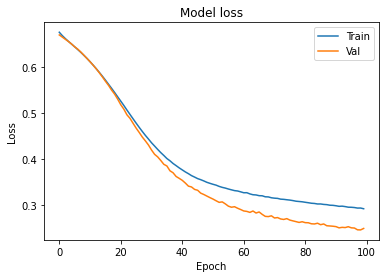

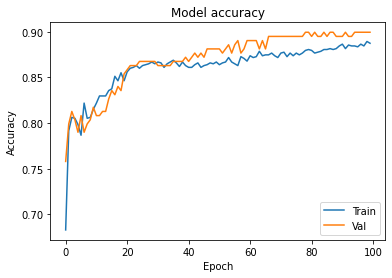

In [18]:
#visualizing loss and accuracy
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy']) #use "accuracy" instead of acc
plt.plot(hist.history['val_accuracy']) #same as previous line
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()